In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
topzip = pd.read_csv('topzip.csv')
topzip.head()

,time,Zipcode,value
0,1996-04-01,7030,301600.0
1,1996-04-01,11211,133200.0
2,1996-04-01,7302,137200.0
3,1996-04-01,11216,146100.0
4,1996-04-01,11222,149200.0


In [23]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [24]:
CT = topzip[topzip['Zipcode'].isin(['6820', '6068', '6793'])]

In [25]:
CT

,Zipcode,value
time,,
1996-04-01,6820,552100.0
1996-04-01,6068,191600.0
1996-04-01,6793,280800.0
1996-05-01,6820,553400.0
1996-05-01,6068,191900.0
...,...,...
2018-03-01,6068,473200.0
2018-03-01,6793,644400.0
2018-04-01,6820,1388100.0


In [26]:
first = CT[CT['Zipcode'] == 6820]
first

,Zipcode,value
time,,
1996-04-01,6820,552100.0
1996-05-01,6820,553400.0
1996-06-01,6820,554800.0
1996-07-01,6820,556000.0
1996-08-01,6820,557000.0
...,...,...
2017-12-01,6820,1375600.0
2018-01-01,6820,1374700.0
2018-02-01,6820,1379100.0


In [27]:
first.drop(['Zipcode'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
first

,value
time,
1996-04-01,552100.0
1996-05-01,553400.0
1996-06-01,554800.0
1996-07-01,556000.0
1996-08-01,557000.0
...,...
2017-12-01,1375600.0
2018-01-01,1374700.0
2018-02-01,1379100.0


In [29]:
roll_mean = first.rolling(window=12, center=False).mean()
roll_std = first.rolling(window=12, center=False).std()

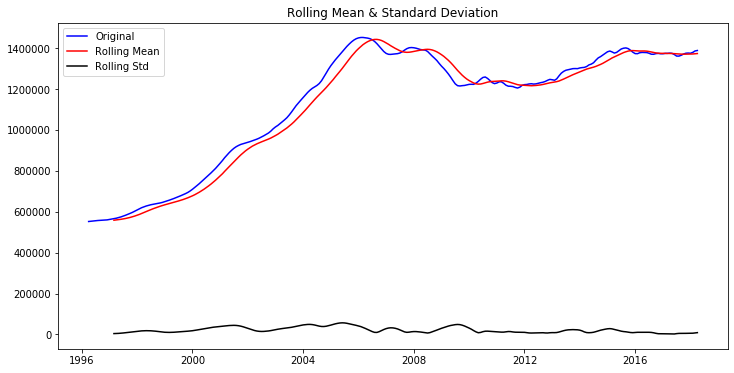

In [31]:
fig = plt.figure(figsize=(12,6))
plt.plot(first, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.21629346214937767
Fail to reject the null hypothesis. Data is not stationary.



In [76]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.172724
p-value                          0.216293
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [77]:
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [138]:
diff = first.diff().dropna()
diff

,value
time,
1996-05-01,1300.0
1996-06-01,1400.0
1996-07-01,1200.0
1996-08-01,1000.0
1996-09-01,700.0
...,...
2017-12-01,800.0
2018-01-01,-900.0
2018-02-01,4400.0


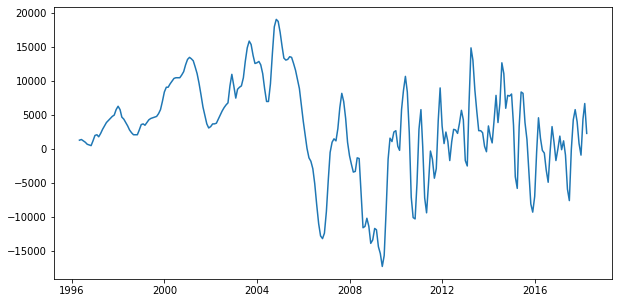

In [139]:
plt.figure(figsize=(10,5))
plt.plot(diff)

In [140]:
dftest = adfuller(diff['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.16860903977569758
Fail to reject the null hypothesis. Data is not stationary.



In [145]:
dif2 = diff.diff().dropna()
dif2

,value
time,
1996-06-01,100.0
1996-07-01,-200.0
1996-08-01,-200.0
1996-09-01,-300.0
1996-10-01,-100.0
...,...
2017-12-01,-3200.0
2018-01-01,-1700.0
2018-02-01,5300.0


In [146]:
dftest = adfuller(dif2['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 6.683827826659538e-07
Reject the null hypothesis. Data is stationary.



In [147]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.728519e+00
p-value                        6.683828e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


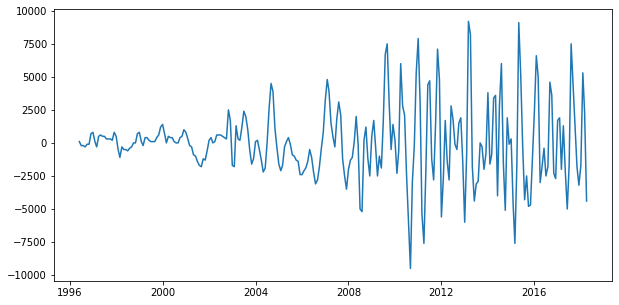

In [148]:
plt.figure(figsize=(10,5))
plt.plot(dif2)

I is 2 as diff is 2 to de stationary 
MA(q) parameter is 0
AR(p) parameter is 

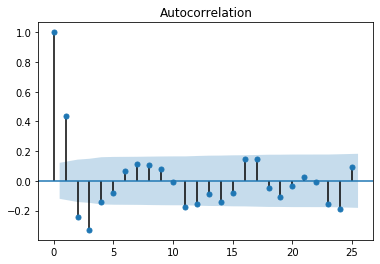

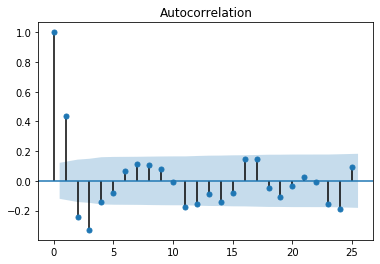

In [152]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(dif2[:-1], alpha=.05)

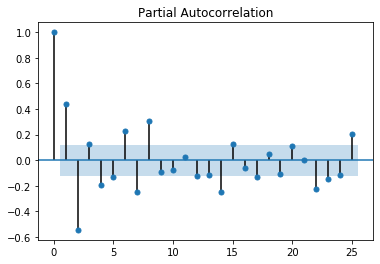

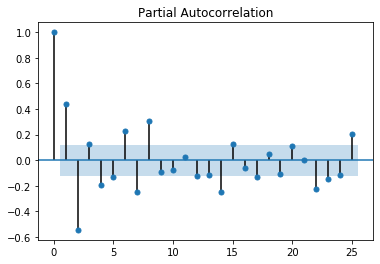

In [153]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_pacf(dif2[:-1], alpha=.05)